In [1]:
from pathlib import Path
#import scanpy as sc
#import cell2location
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

DPI = 300
FONTSIZE = 20  # 42
#sc.settings.set_figure_params(
    #scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
#)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

#from vistools import utils

import scikit_posthocs

import seaborn as sns
custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)


In [2]:
SAMPLE_NAME = "concat_withWu2022"

In [3]:
# store results
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/{SAMPLE_NAME}/microenvs_geneexp/gene_signatures/"
)  # to change
DIR2SAVE.mkdir(parents=True, exist_ok=True)

# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
df = pd.read_csv(DIR2SAVE.joinpath('cell2loc_gene_signature_scores_microenvs.csv'),
                 sep='\t',
                 header=0,
                 index_col=0
                )

In [5]:
df_melt = pd.melt(df.reset_index(), 
                             id_vars=['spot_id', 'Sample', 'segmentation_labels'], 
                             value_vars=['MP6 Hypoxia', 'MP12 EMT-I', 'MP13 EMT-II', 
                                         'MP14 EMT-III ', 'MP15 EMT IV', 'MP17 Interferon', 
                                         'MP18 Interferon', 'EpiHR', 'TME_HR', 'CRISB',
                                         'HNF4A_+_+_(453g)', 'FOSL1_+_+_(261g)',
                                         'TEAD1_+_+_(105g)','FOS_+_+_(274g)', 'NFKB1_+_+_(51g)',
                                         'CDX2_+_+_(219g)', 'JUND_+_+_(329g)', 'FOSL2_+_+_(166g)',
                                         'JUNB_+_+_(302g)', 'RELB_+_+_(47g)', 'ASCL2_+_+_(346g)',
                                         'LEF1_+_+_(142g)', 'TEAD4_+_+_(99g)', 'FOSB_+_+_(189g)',
                                         'JUN_+_+_(265g)',
                                         'AP-1 regulon', 'NF-kB regulon'
                                        ],
                             var_name='Gene signatures', 
                             value_name='Score')

In [6]:
palette = [
    "#fdb462", #0
    "#FCCDE5", #1
    "#FB8072", #2
    "#e78ac3", #3
    "#67A9CF", #4
    "#feed8b", #5
    "#1f78b4", #6
    "#91CF60", #7 
    "#b3ffff", #8 
    "#33a02c" #9
] 

### Statistical test of significance

1. lets's do Kruskal-Wallis
2. As follow up- Post-hoc test: Dunn
Multiple hypothesis correction was used in the post-hoc Dunn test


-- MP6 Hypoxia
6115.872478591873 0.0


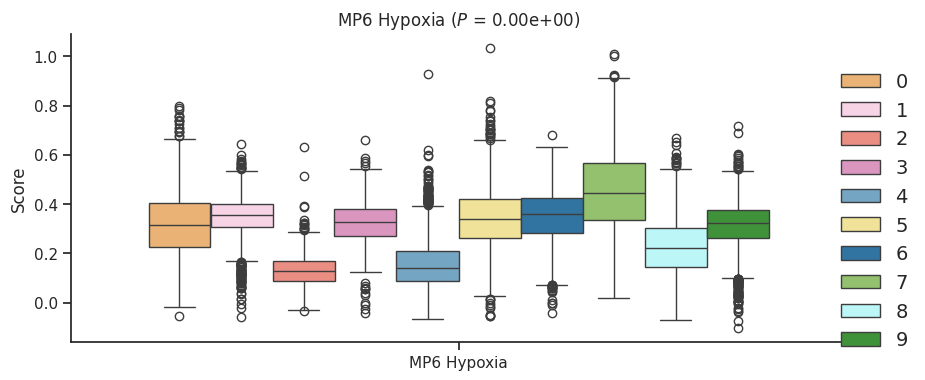

-- MP12 EMT-I
11078.979054728123 0.0


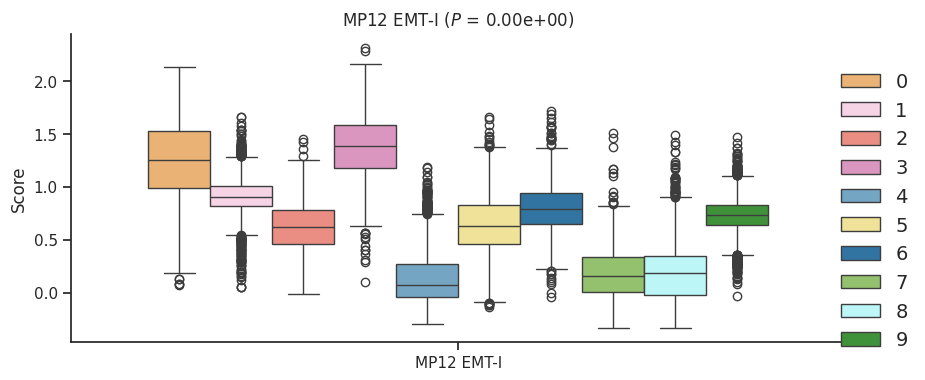

-- MP13 EMT-II
8193.27974469984 0.0


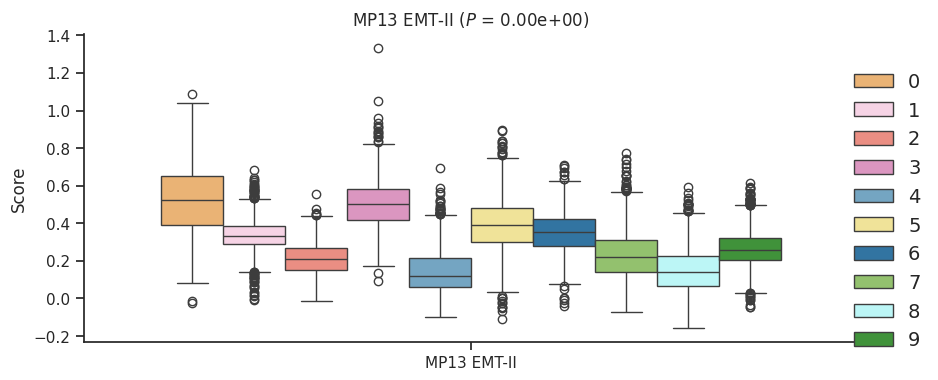

-- MP14 EMT-III 
9911.088707662646 0.0


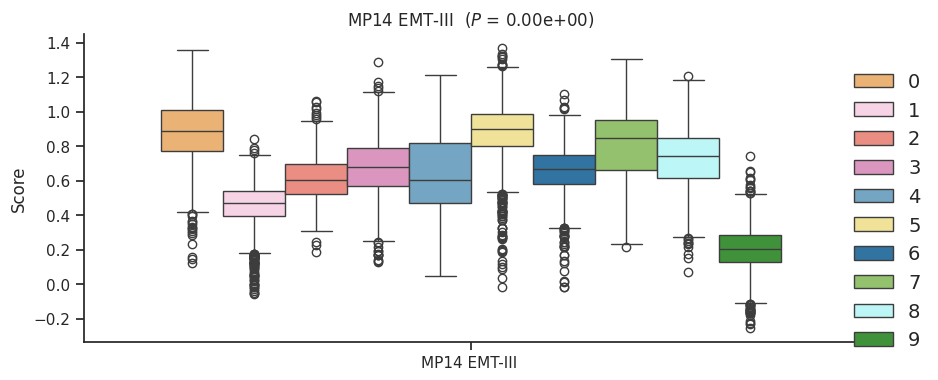

-- MP15 EMT IV
10447.221154105406 0.0


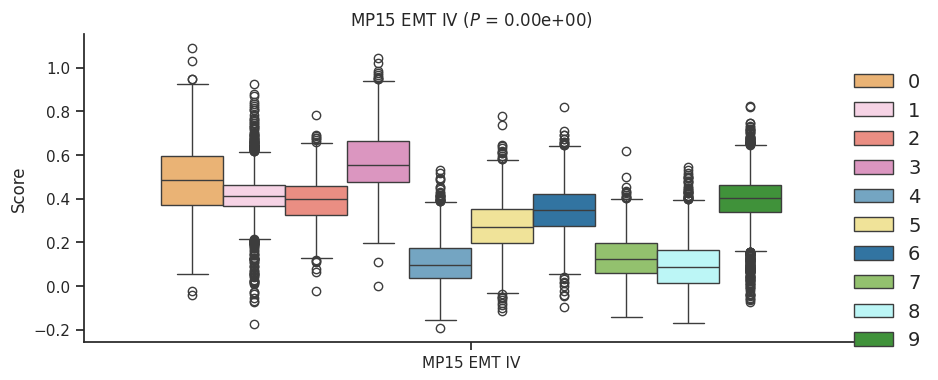

-- MP17 Interferon
8233.94717491752 0.0


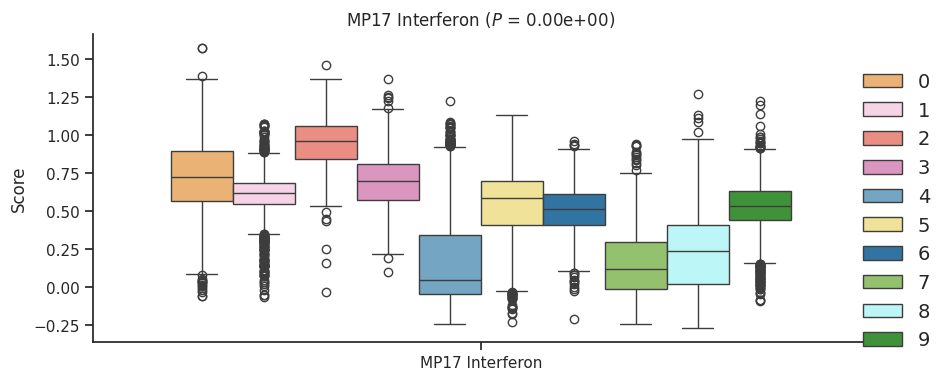

-- MP18 Interferon
12085.534051285507 0.0


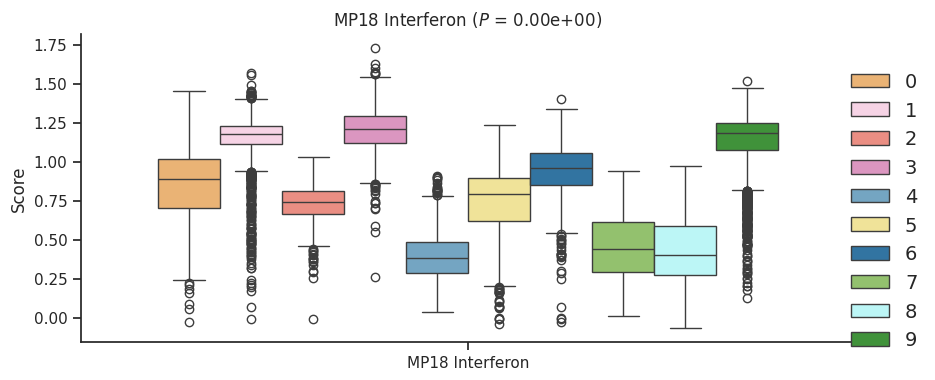

-- EpiHR
6319.233935859214 0.0


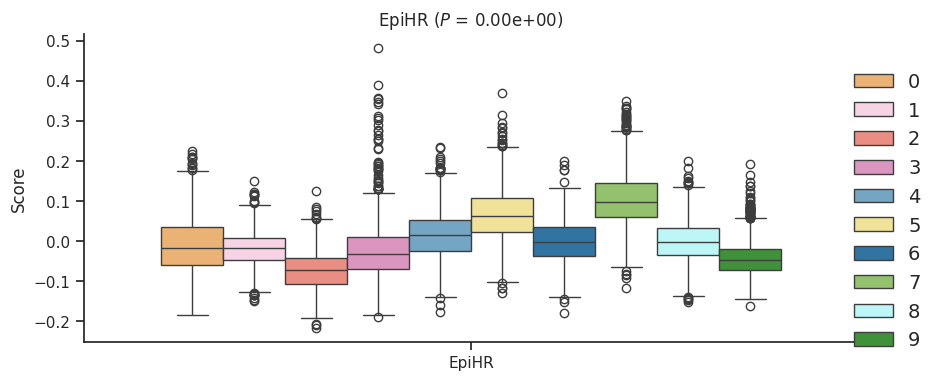

-- TME_HR
12311.362788826642 0.0


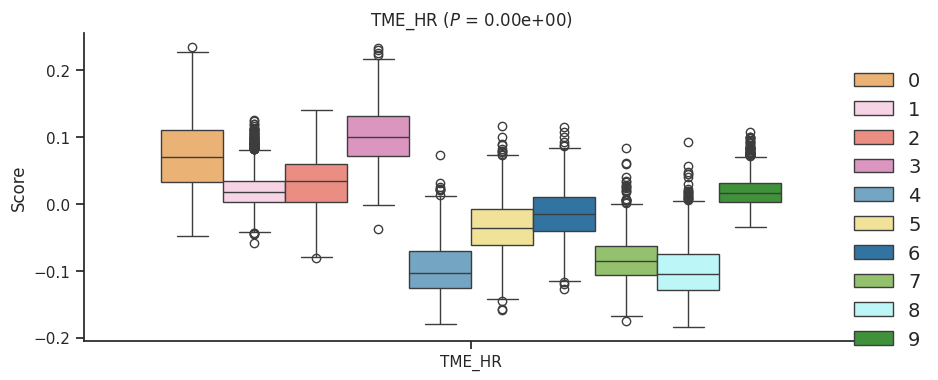

-- CRISB
3267.7227164131687 0.0


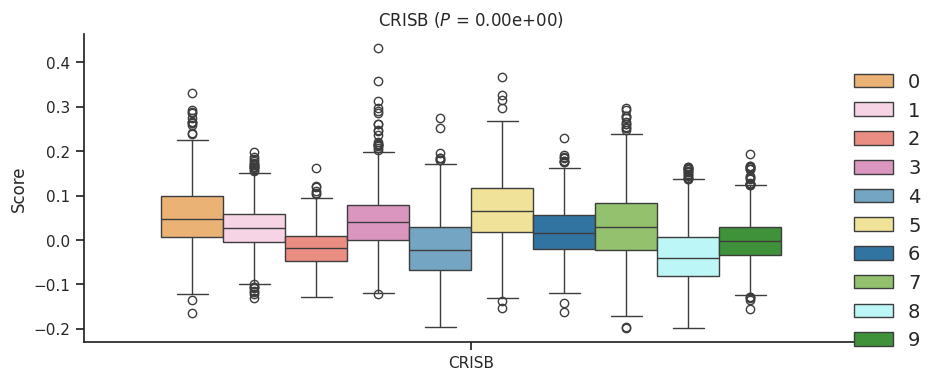

-- HNF4A_+_+_(453g)
9587.461674526669 0.0


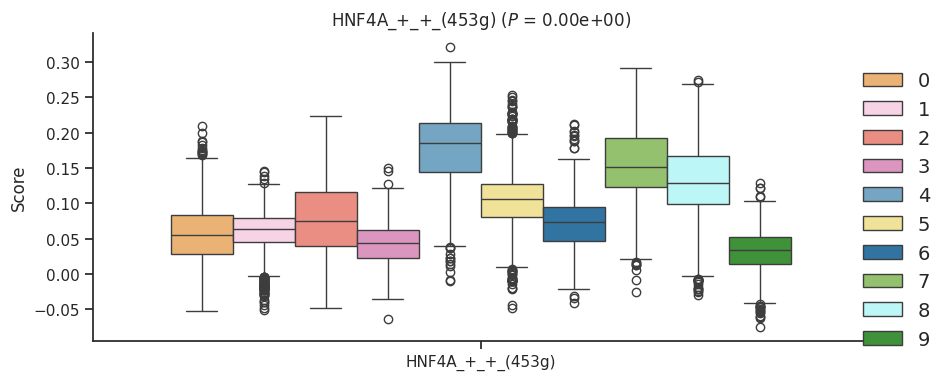

-- FOSL1_+_+_(261g)
6694.174520442058 0.0


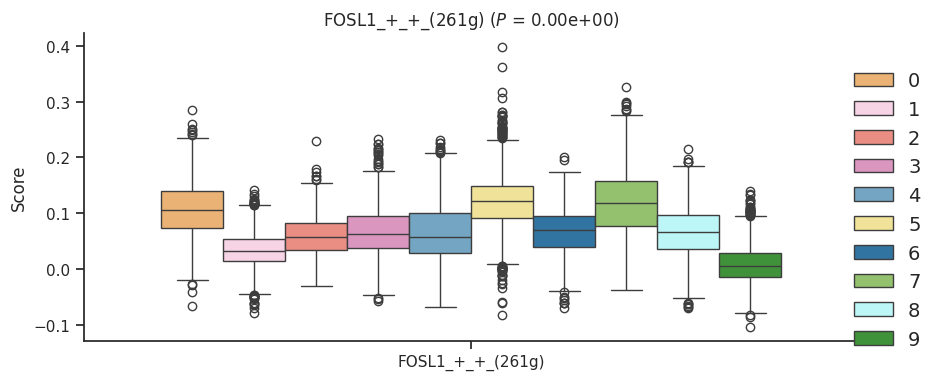

-- TEAD1_+_+_(105g)
2060.5701332095528 0.0


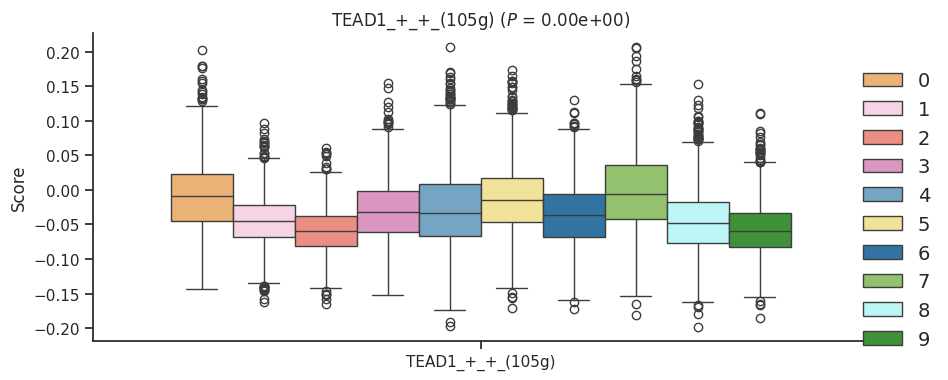

-- FOS_+_+_(274g)
7051.447339718696 0.0


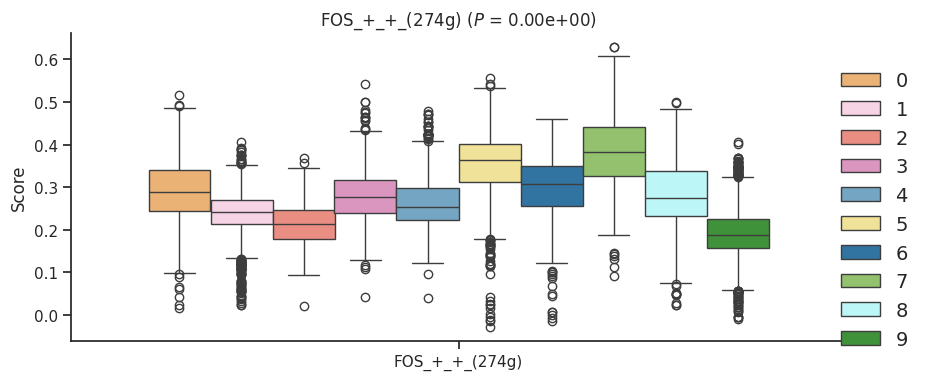

-- NFKB1_+_+_(51g)
2123.403706695621 0.0


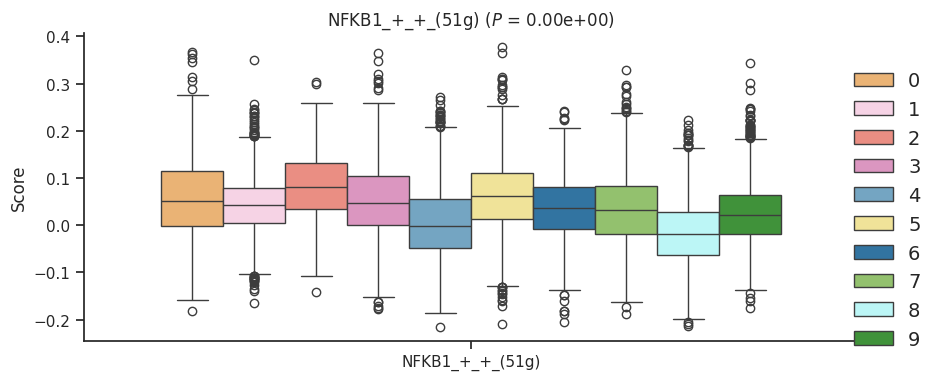

-- CDX2_+_+_(219g)
11043.308562356853 0.0


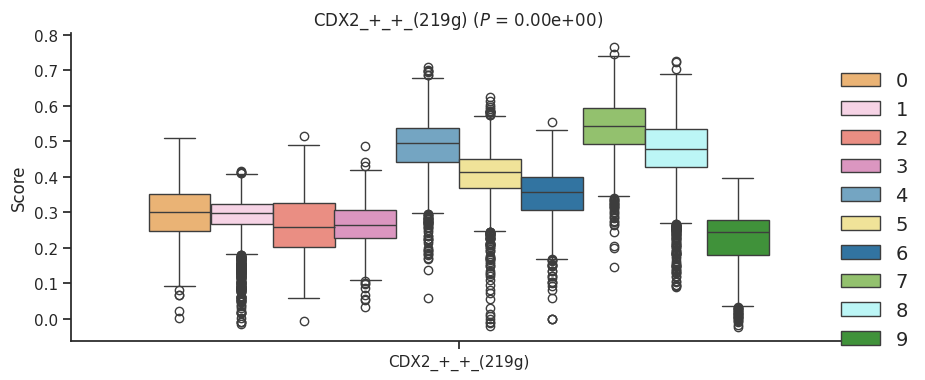

-- JUND_+_+_(329g)
7097.697774839933 0.0


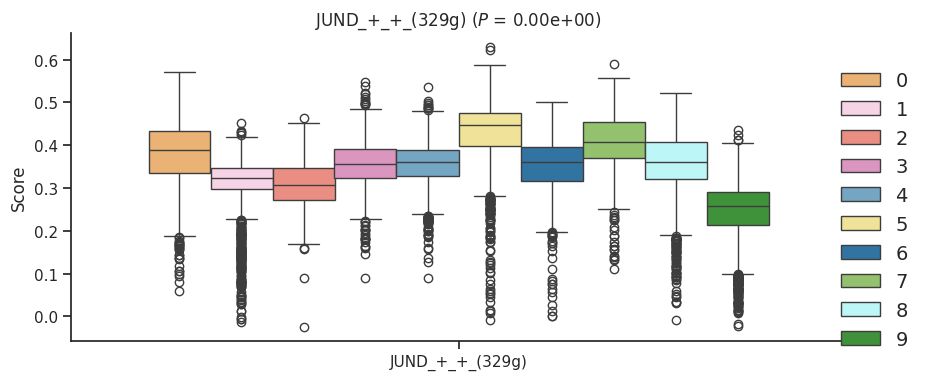

-- FOSL2_+_+_(166g)
6119.361761222116 0.0


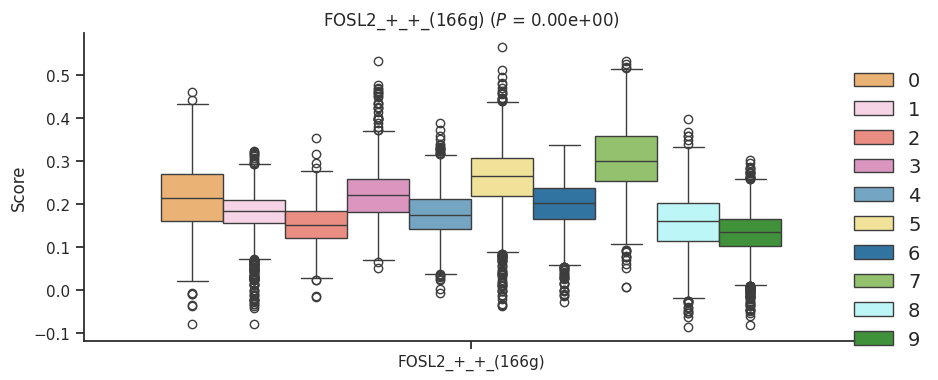

-- JUNB_+_+_(302g)
8692.246251199234 0.0


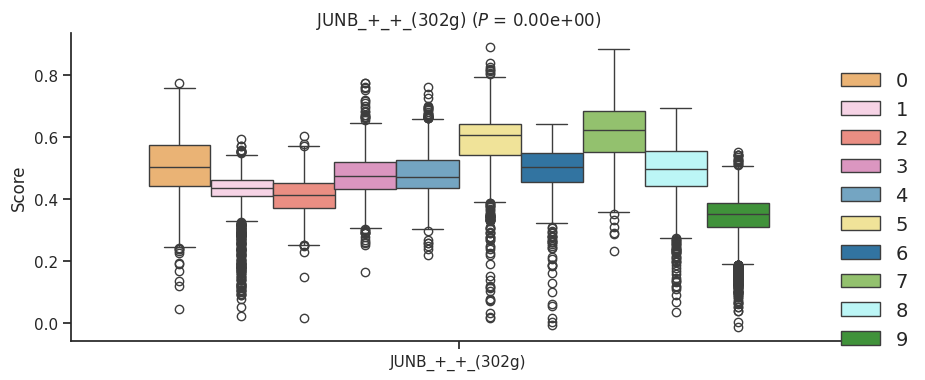

-- RELB_+_+_(47g)
3753.0465479784434 0.0


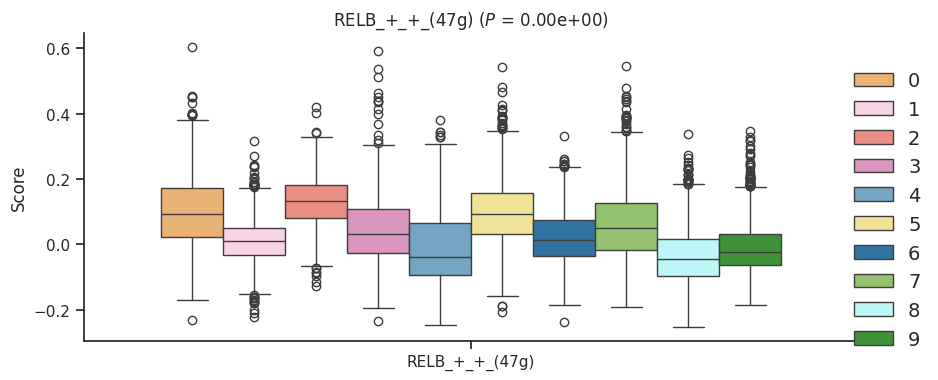

-- ASCL2_+_+_(346g)
11380.065989339422 0.0


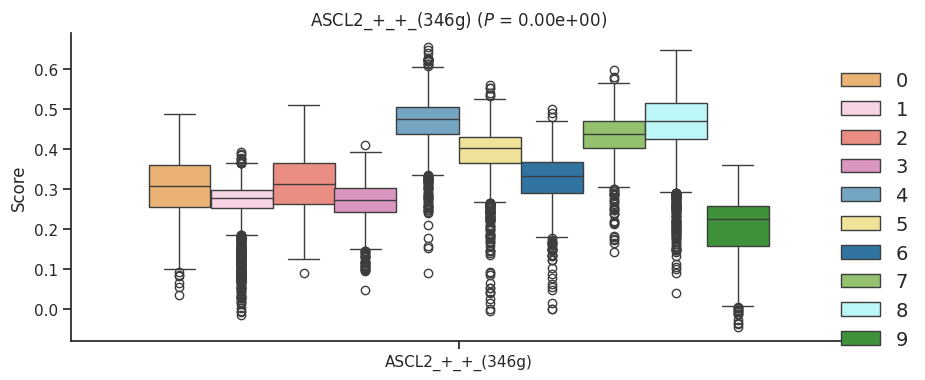

-- LEF1_+_+_(142g)
2745.5197264586513 0.0


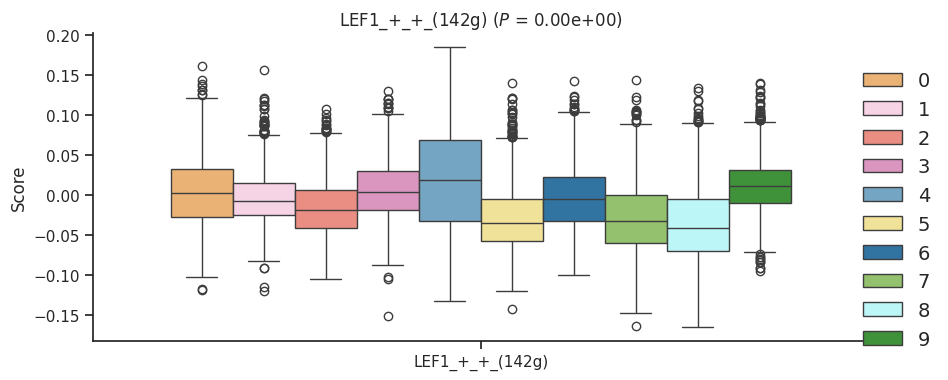

-- TEAD4_+_+_(99g)
7855.739775272027 0.0


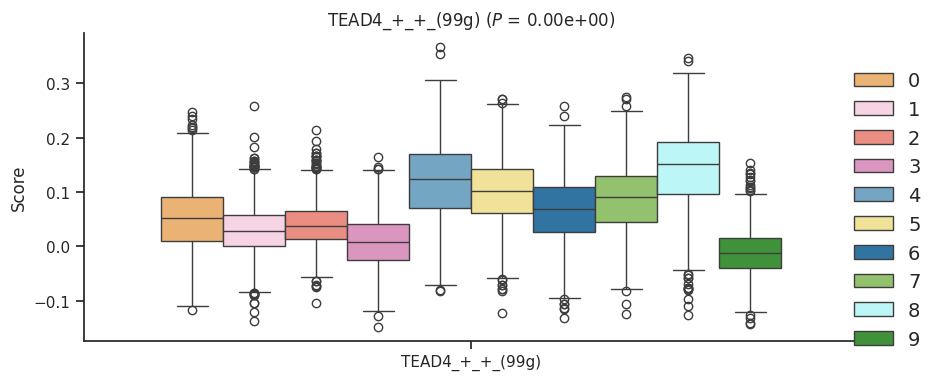

-- FOSB_+_+_(189g)
3898.533964292714 0.0


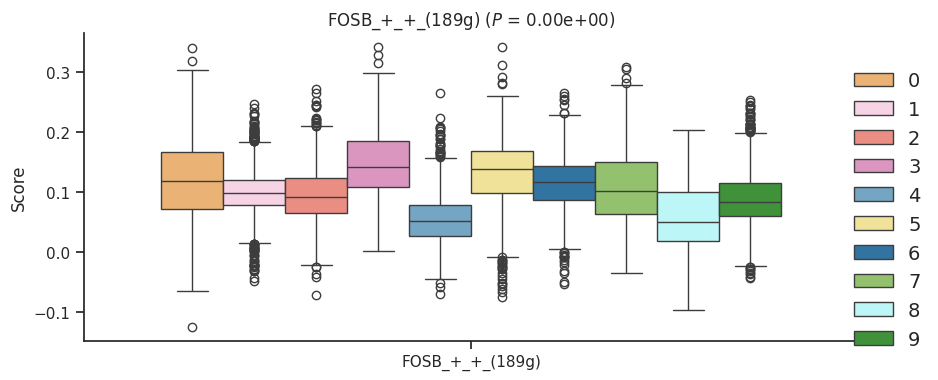

-- JUN_+_+_(265g)
8846.185771224897 0.0


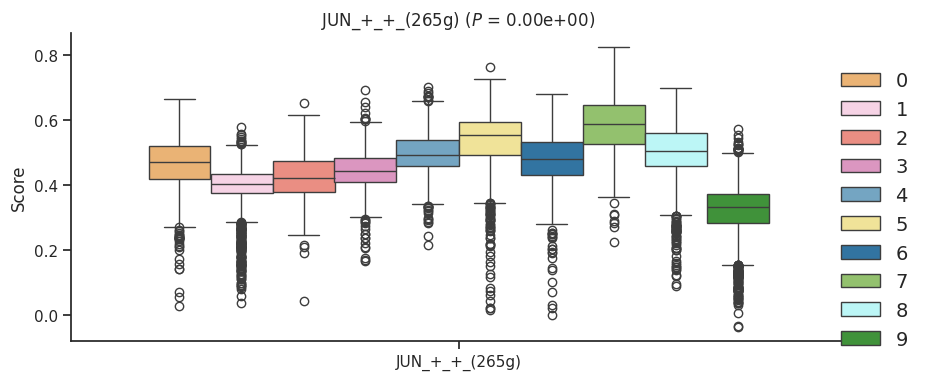

-- AP-1 regulon
9490.84914615917 0.0


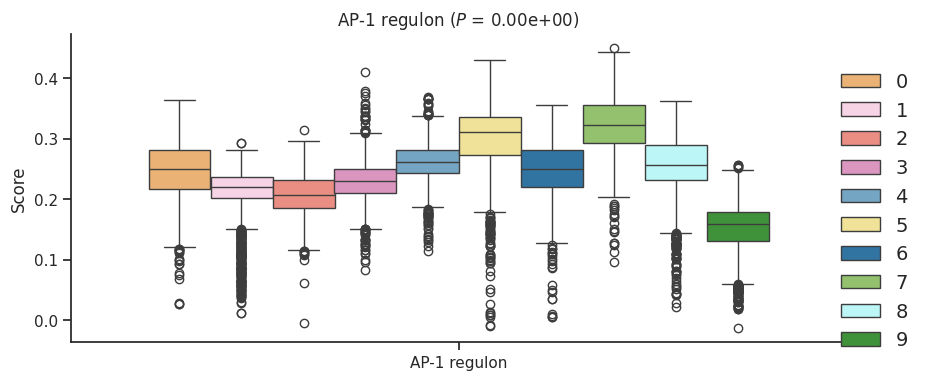

-- NF-kB regulon
3523.6304987329877 0.0


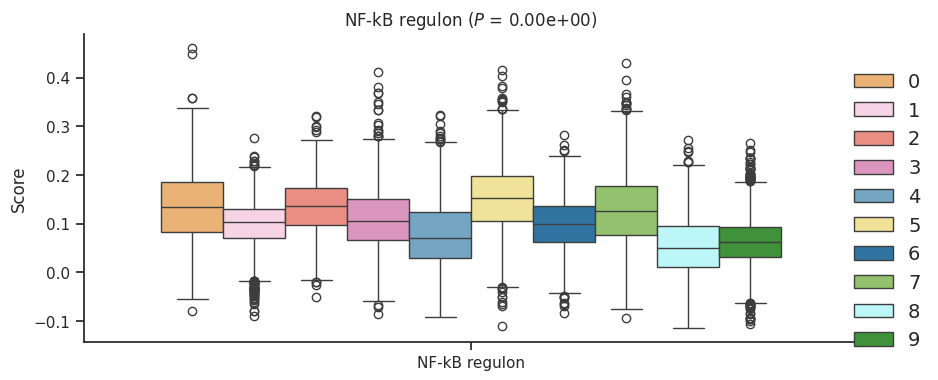

In [7]:
results_kruskal_test = dict()
for c2p in df_melt['Gene signatures'].unique():
    print("--", c2p)
    df_melt_c2p = df_melt[df_melt['Gene signatures']==c2p].copy()
    df_melt_c2p.segmentation_labels = df_melt_c2p.segmentation_labels.astype('int').astype('category')
    
    statistic, pval = stats.kruskal(df_melt_c2p[df_melt_c2p['segmentation_labels']==0]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==1]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==2]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==3]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==4]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==5]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==6]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==7]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==8]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==9]['Score'],
                  )
    print(statistic, pval)
    results_kruskal_test[c2p] = (statistic, pval)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
    sns.boxplot(data=df_melt_c2p,
                x="Gene signatures", 
                y="Score", 
                hue="segmentation_labels",
                palette=palette,
                ax=ax,
                #flierprops={"marker": "o", "markerfacecolor": "None"}
               )
    ax.legend(
              bbox_to_anchor=(1.09, 0.9), 
              loc='upper right',
              fontsize=14,
              facecolor="white",
              edgecolor="white",
              ncol=1,
              borderaxespad=0.0,
              framealpha=0,
              frameon=False,
             )
    ax.set_title(r"{} ($P$ = {:0.2e})".format(c2p, results_kruskal_test[c2p][1]))
    ax.set_xlabel('')
    sns.despine()
    plt.savefig(FIG2SAVE.joinpath(f"Boxplot_gene_signature_cellular_neighbourhoods_{c2p}_al.pdf"), 
                dpi=DPI, format="pdf", 
                bbox_inches="tight")
    plt.show()


In [8]:
df_melt_subset = df_melt[df_melt['segmentation_labels'].isin([0, 4, 5, 6, 7, 8])].copy()
df_melt_subset.segmentation_labels = df_melt_subset.segmentation_labels.astype('int').astype('category')

In [9]:
palette_subset = [
    "#1f78b4", #6
    "#b3ffff", #8 
    "#67A9CF", #4
    "#fdb462", #0
    "#feed8b", #5
    "#91CF60", #7 
]  #6, 8, 4, 0, 5, 7

-- MP6 Hypoxia
3704.419967863068 0.0


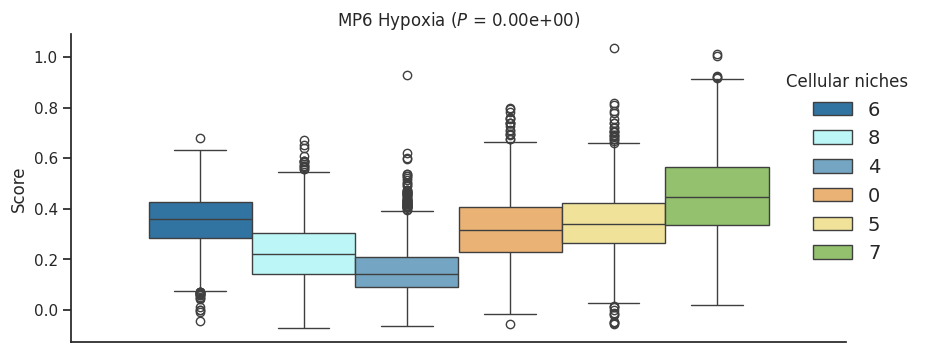

-- MP12 EMT-I
5185.677366445447 0.0


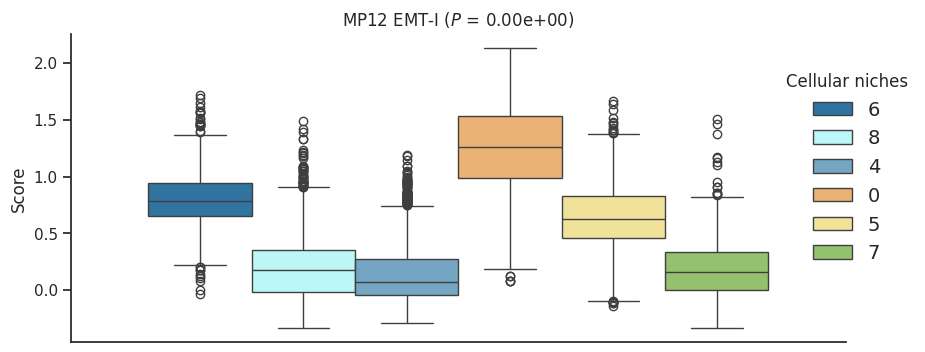

-- MP13 EMT-II
4641.508165122968 0.0


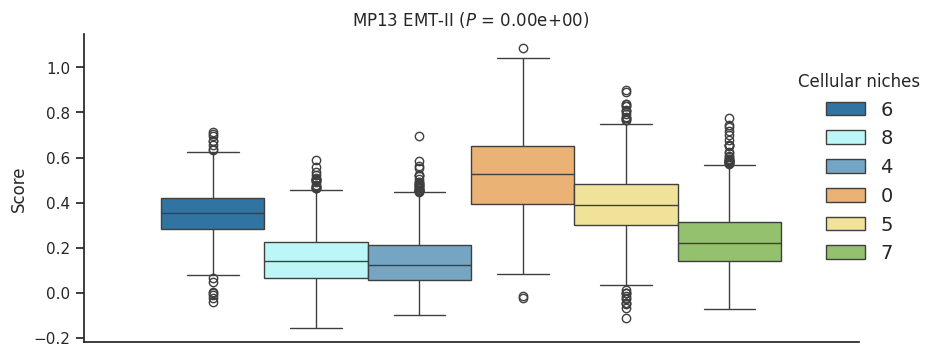

-- MP14 EMT-III 
2055.6169875374035 0.0


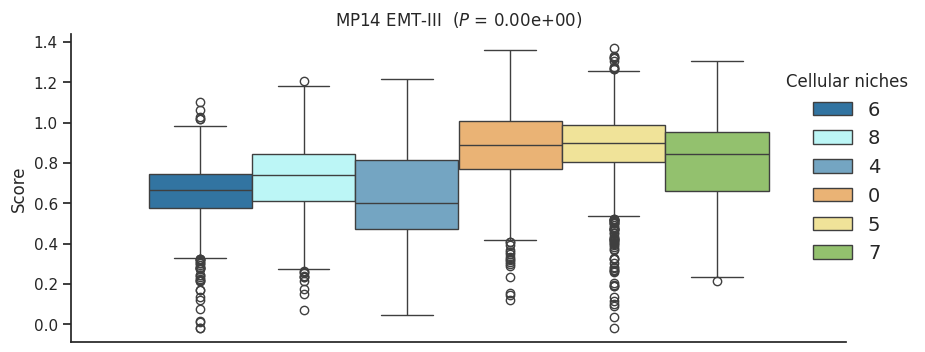

-- MP15 EMT IV
4652.267143440666 0.0


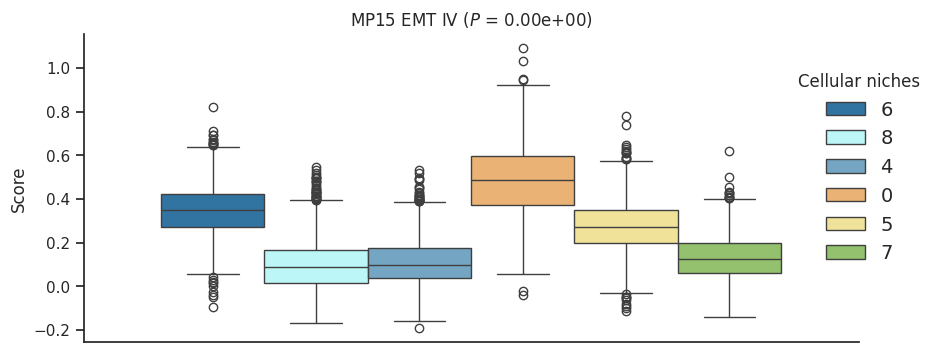

-- MP17 Interferon
3501.0117172369646 0.0


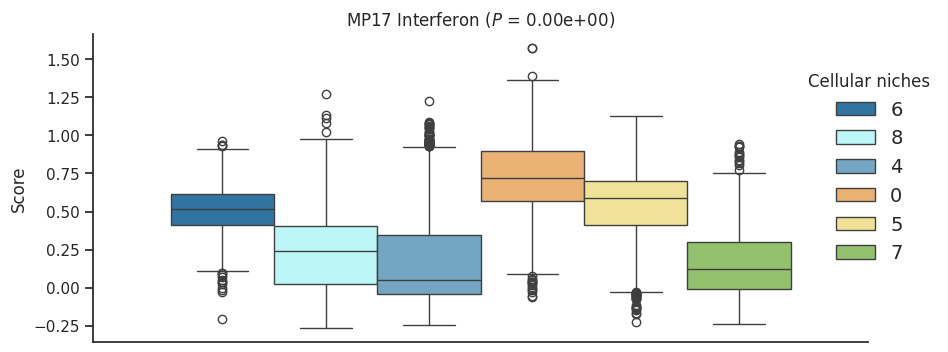

-- MP18 Interferon
4800.017911296617 0.0


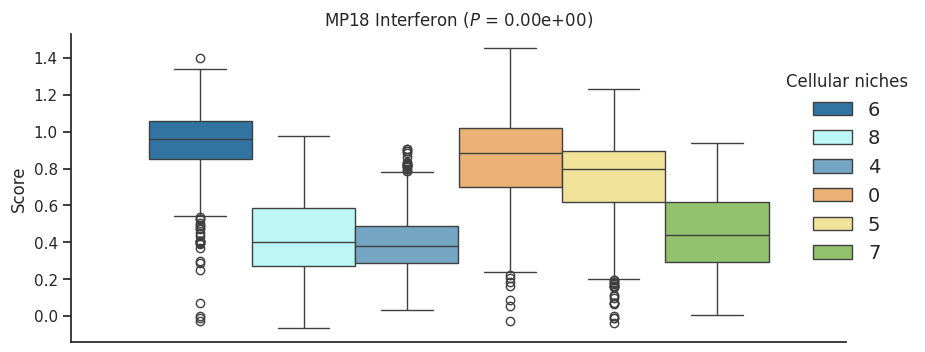

-- EpiHR
2847.9694225058265 0.0


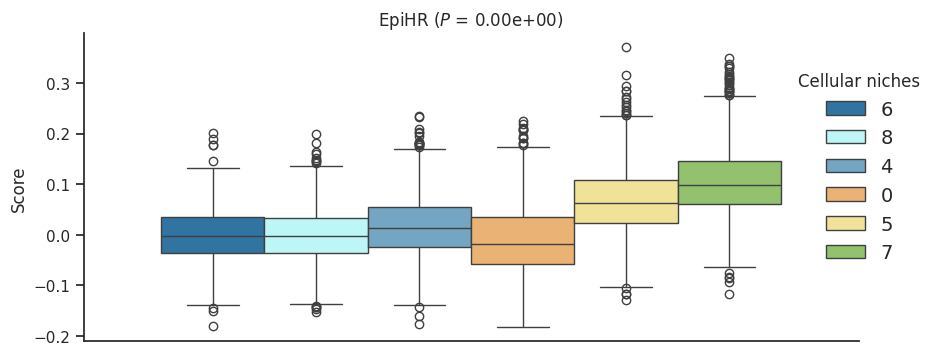

-- TME_HR
5120.599941412911 0.0


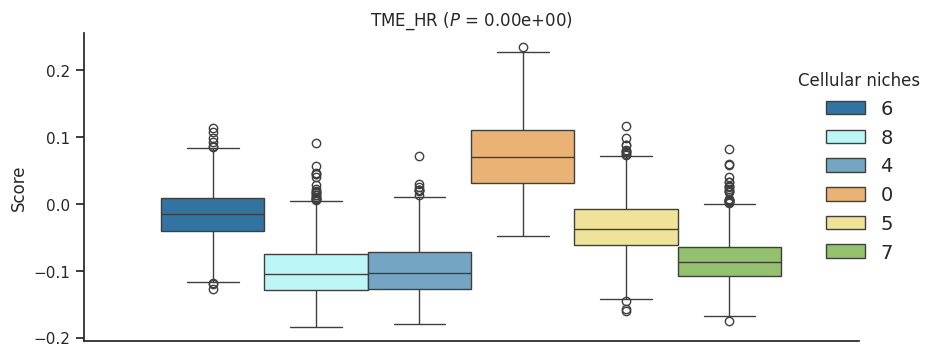

-- CRISB
2229.3619531855834 0.0


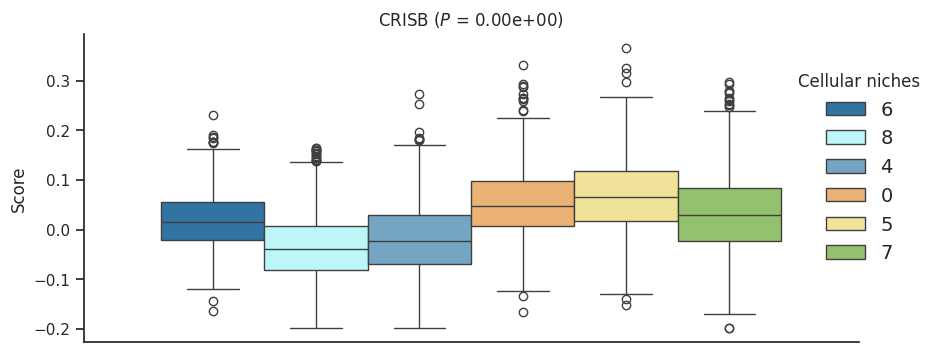

-- HNF4A_+_+_(453g)
3858.1203085617854 0.0


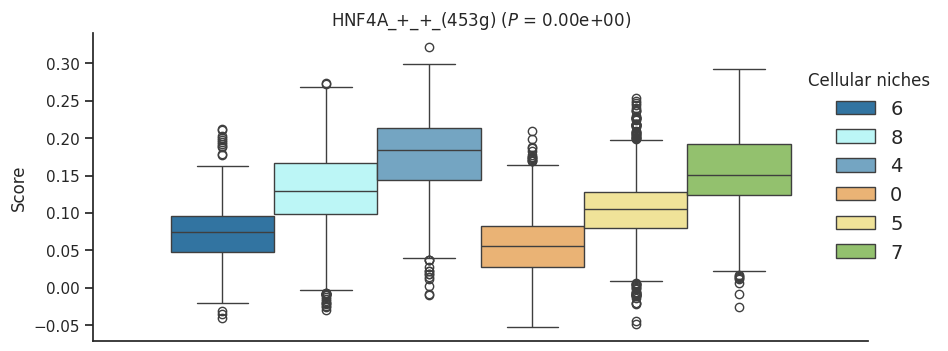

-- FOSL1_+_+_(261g)
1987.3246395255776 0.0


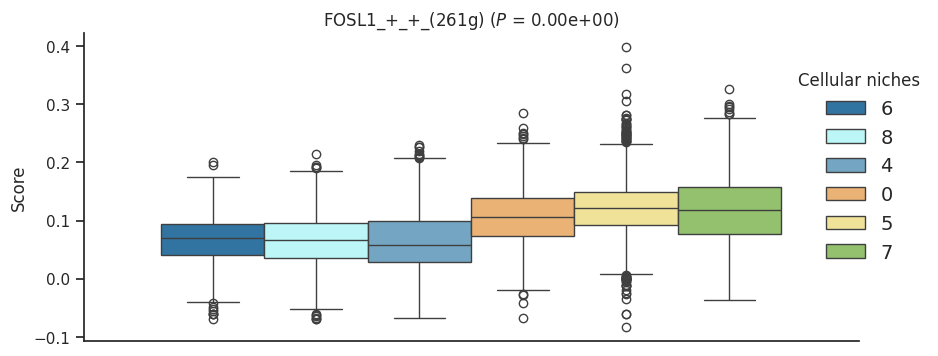

-- TEAD1_+_+_(105g)
836.3729598748773 1.5627697036818054e-178


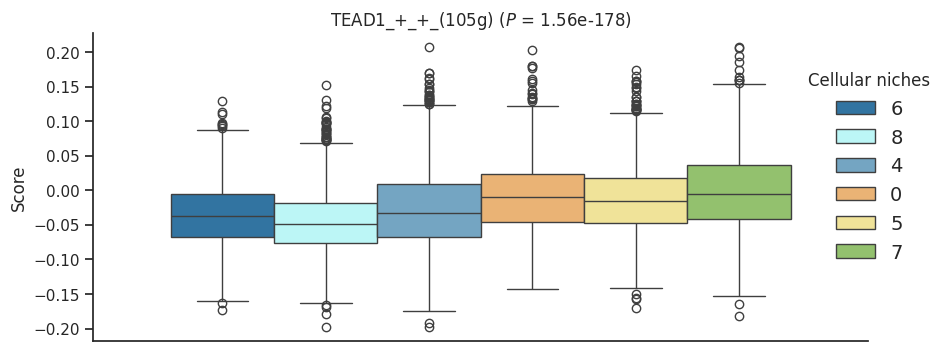

-- FOS_+_+_(274g)
2627.7125094630283 0.0


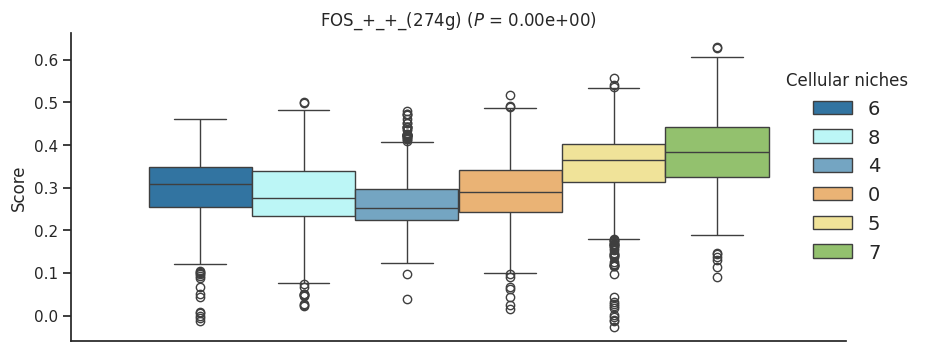

-- NFKB1_+_+_(51g)
1333.2328998204503 4.030036384420559e-286


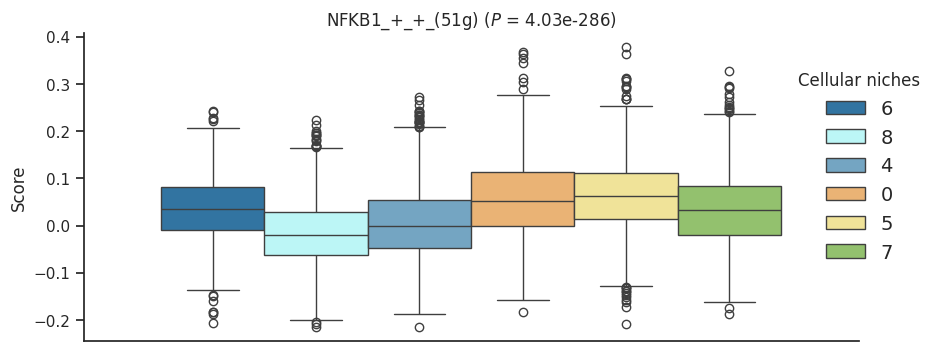

-- CDX2_+_+_(219g)
4232.137557596763 0.0


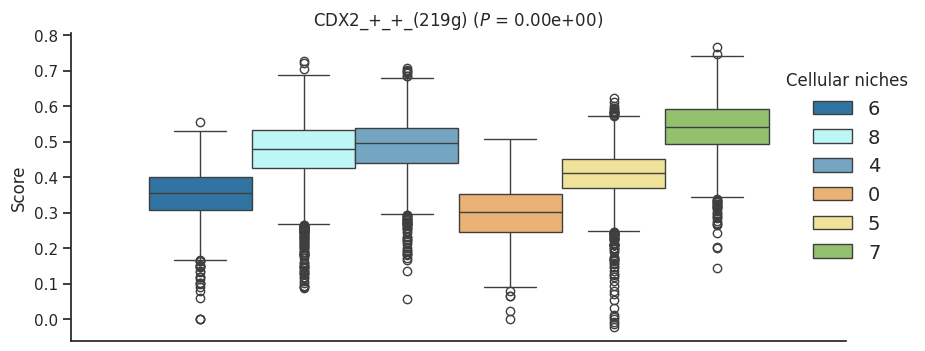

-- JUND_+_+_(329g)
1826.6646868511625 0.0


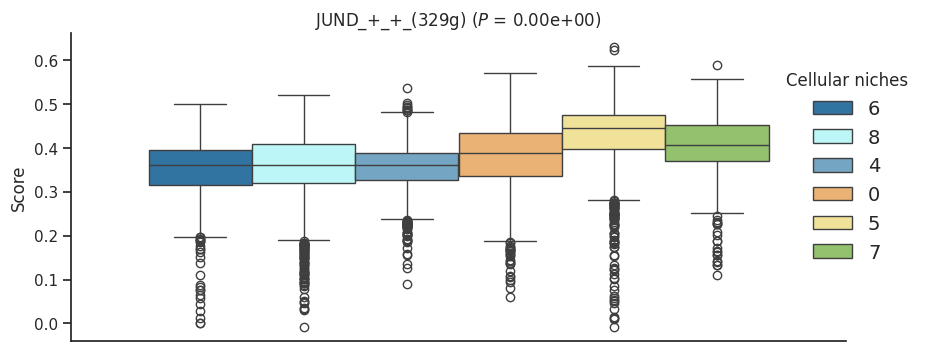

-- FOSL2_+_+_(166g)
3585.727204022363 0.0


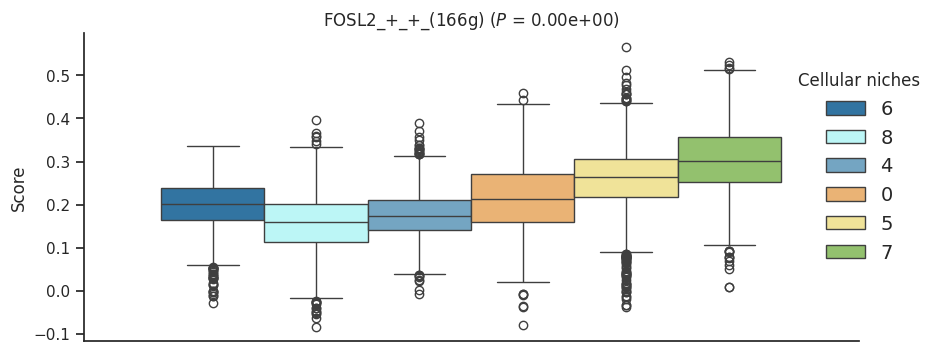

-- JUNB_+_+_(302g)
2814.5673246442857 0.0


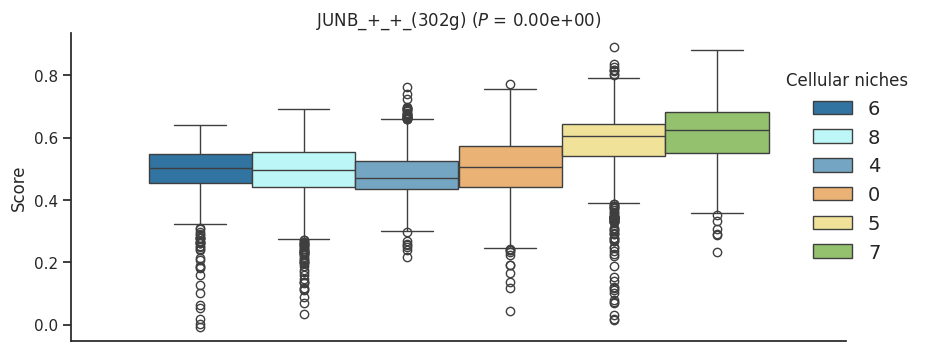

-- RELB_+_+_(47g)
2130.9454204988338 0.0


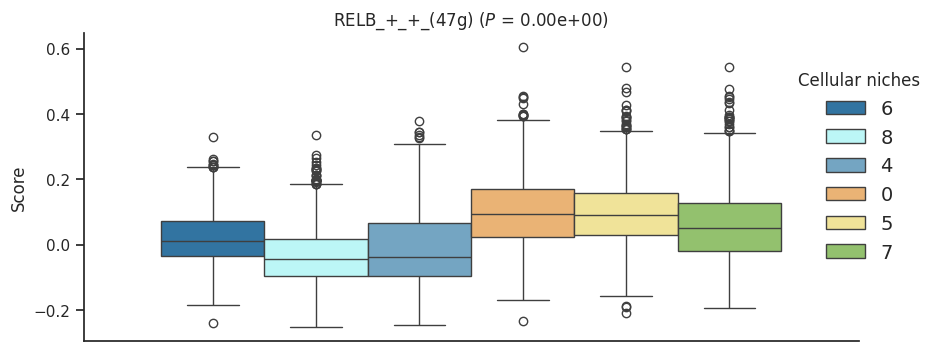

-- ASCL2_+_+_(346g)
4106.42740672662 0.0


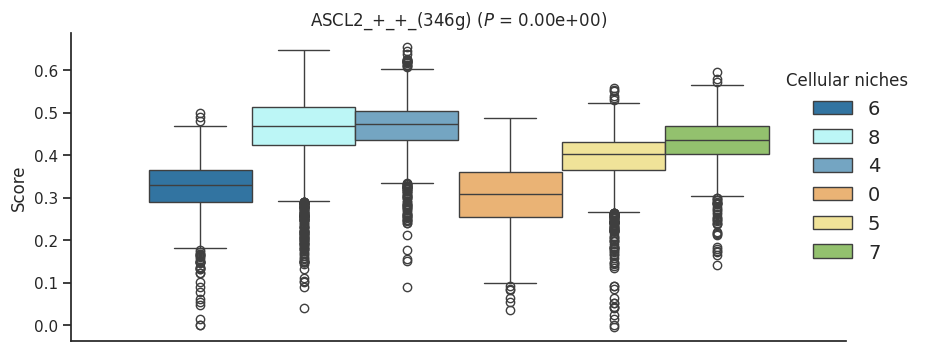

-- LEF1_+_+_(142g)
1411.039973982508 5.5797351113024694e-303


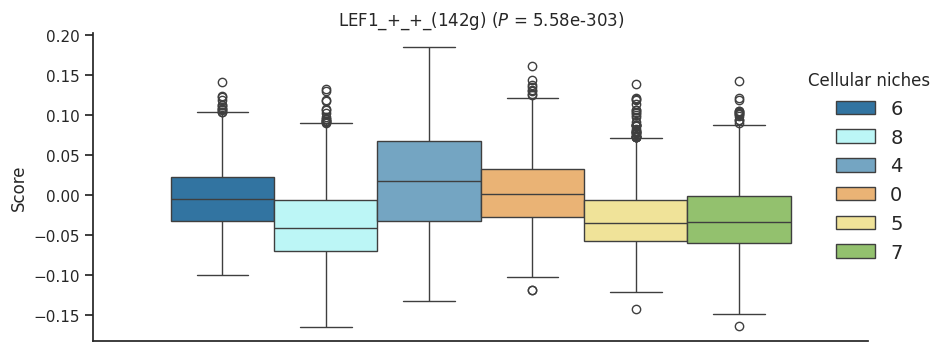

-- TEAD4_+_+_(99g)
1687.6115604687598 0.0


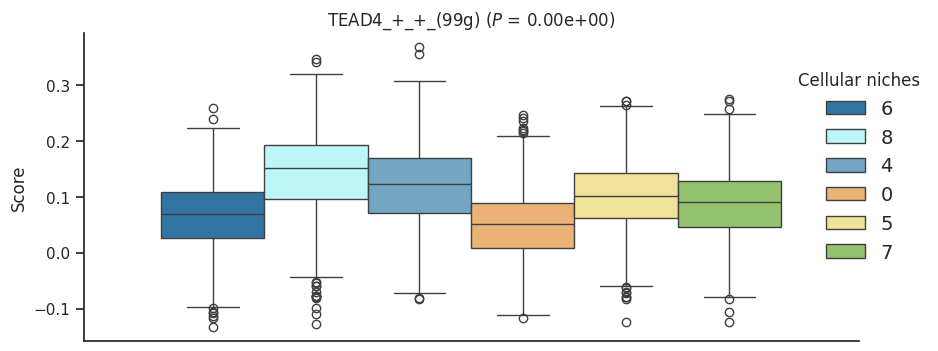

-- FOSB_+_+_(189g)
2556.46142059104 0.0


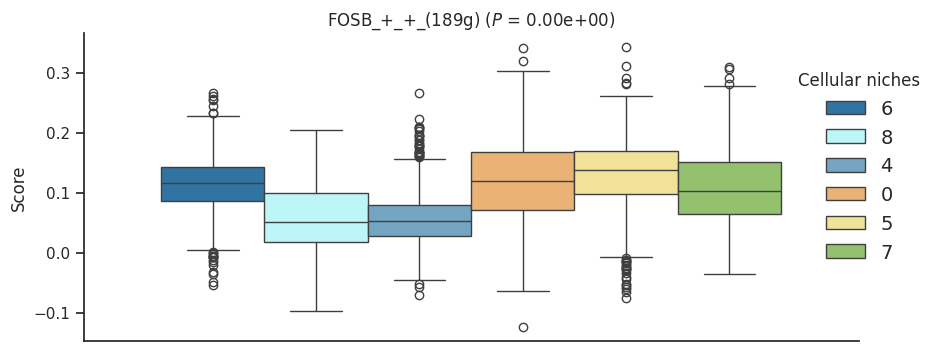

-- JUN_+_+_(265g)
1815.3781187576606 0.0


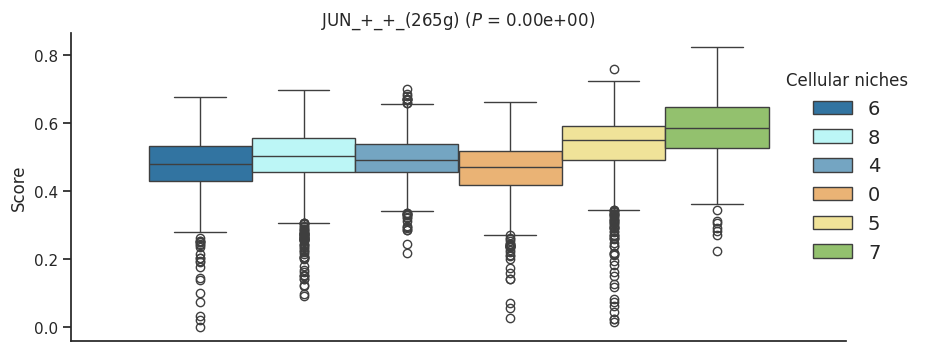

-- AP-1 regulon
2680.418015287687 0.0


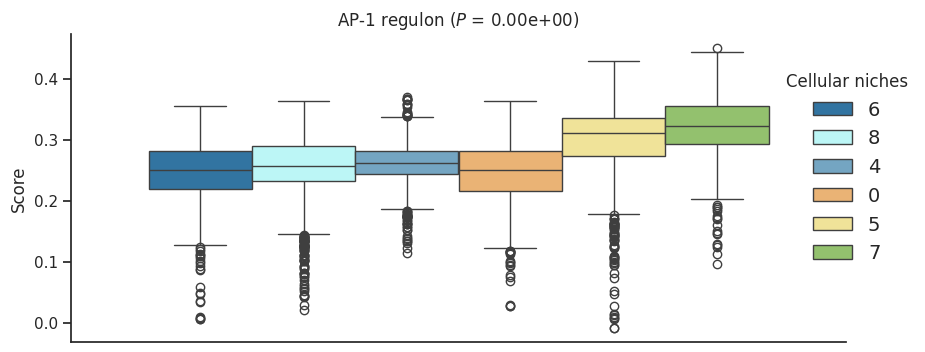

-- NF-kB regulon
2201.5887944457004 0.0


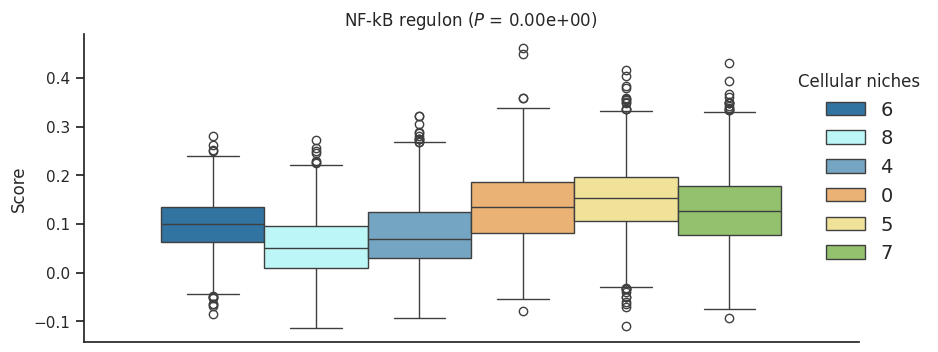

In [10]:
results_kruskal_test = dict()
for c2p in df_melt_subset['Gene signatures'].unique():
    print("--", c2p)
    df_melt_c2p = df_melt_subset[df_melt_subset['Gene signatures']==c2p].copy()
    df_melt_c2p.segmentation_labels = df_melt_c2p.segmentation_labels.astype('int').astype('category')
    
    statistic, pval = stats.kruskal(df_melt_c2p[df_melt_c2p['segmentation_labels']==0]['Score'],
                                    #df_melt_c2p[df_melt_c2p['segmentation_labels']==1]['Score'],
                                    #df_melt_c2p[df_melt_c2p['segmentation_labels']==2]['Score'],
                                    #df_melt_c2p[df_melt_c2p['segmentation_labels']==3]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==4]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==5]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==6]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==7]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==8]['Score'],
                                    #df_melt_c2p[df_melt_c2p['segmentation_labels']==9]['Score'],
                  )
    print(statistic, pval)
    results_kruskal_test[c2p] = (statistic, pval)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
    sns.boxplot(data=df_melt_c2p,
                x="Gene signatures", 
                y="Score", 
                hue="segmentation_labels",
                hue_order = [6, 8, 4, 0, 5, 7],
                palette=palette_subset,
                ax=ax,
                #flierprops={"marker": "o", "markerfacecolor": "None"}
               )
    ax.legend(
              bbox_to_anchor=(1.09, 0.9), 
              loc='upper right',
              fontsize=14,
              facecolor="white",
              edgecolor="white",
              ncol=1,
              borderaxespad=0.0,
              framealpha=0,
              frameon=False,
             )
    
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Cellular niches")
    legend.set_frame_on(False)
    
    ax.set_title(r"{} ($P$ = {:0.2e})".format(c2p, results_kruskal_test[c2p][1]))
    ax.set_xlabel("")
    ax.set_xticklabels([]) 
    ax.set_xticks([])
    sns.despine()
    plt.savefig(FIG2SAVE.joinpath(f"Boxplot_gene_signature_cellular_neighbourhoods_{c2p}.pdf"), 
                dpi=DPI, format="pdf", 
                bbox_inches="tight")
    plt.show()


In [11]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp/gene_signatures/figures')

In [12]:
results_dunn_test = dict()
for c in df_melt_subset['Gene signatures'].unique():
    print("--", c)
    tmp_df = df_melt_subset[df_melt_subset['Gene signatures']==c].copy()
    
    data = [tmp_df[tmp_df['segmentation_labels']==0]['Score'].rename('0'),
            tmp_df[tmp_df['segmentation_labels']==4]['Score'].rename('4'),
            tmp_df[tmp_df['segmentation_labels']==5]['Score'].rename('5'),
            tmp_df[tmp_df['segmentation_labels']==7]['Score'].rename('7')
           ]
    
    # Using the posthoc_dunn() function
    p_values = scikit_posthocs.posthoc_dunn(data, p_adjust='fdr_by')
    print(p_values)
    results_dunn_test[c] = p_values

-- MP6 Hypoxia
               1              2              3             4
1   1.000000e+00  7.719621e-138   2.773773e-03  2.039371e-51
2  7.719621e-138   1.000000e+00  1.171021e-263  0.000000e+00
3   2.773773e-03  1.171021e-263   1.000000e+00  5.269628e-46
4   2.039371e-51   0.000000e+00   5.269628e-46  1.000000e+00
-- MP12 EMT-I
              1         2              3              4
1  1.000000e+00  0.000000   7.793808e-67   0.000000e+00
2  0.000000e+00  1.000000   0.000000e+00   1.809300e-05
3  7.793808e-67  0.000000   1.000000e+00  1.495628e-216
4  0.000000e+00  0.000018  1.495628e-216   1.000000e+00
-- MP13 EMT-II
               1             2              3              4
1   1.000000e+00  0.000000e+00   9.606611e-27  3.519653e-214
2   0.000000e+00  1.000000e+00   0.000000e+00   3.632600e-59
3   9.606611e-27  0.000000e+00   1.000000e+00  2.217976e-133
4  3.519653e-214  3.632600e-59  2.217976e-133   1.000000e+00
-- MP14 EMT-III 
               1              2              3   